In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def correlationCul(questionDrop, dataClass):
    # 問卷結果
    # questionnaire = pd.read_excel("Feature/questionnaire.xlsx")
    questionnaire = pd.read_excel("Feature/PSS.xlsx")
    questionnaire.drop(questionDrop, inplace=True)
    # print(questionnaire)
    questionnaire = questionnaire.drop(['受試者編號'], axis=1)

    # 生理資訊
    bioData = pd.read_excel("Feature/" + dataClass + "_relaxation_level_sub.xlsx")
    A_data = bioData[bioData['data_name'].str.contains('A')]
    if (dataClass == "EEG"):
        A_data.drop(index = [12], inplace=True)
        display(A_data)
    A_data = A_data.drop(['data_name'], axis=1)

    # 初始化一個空字典來存儲相關性結果
    correlation_results = {}

    # 計算皮爾森相關係數
    # correlation_eeg, _ = pearsonr(df["Stress_Score"], df["EEG"])
    for q_col in questionnaire.columns:
        correlation_results[q_col] = {}  # 為每個問卷列創建一個子字典
        for col in A_data.columns:
            correlation, _ = pearsonr(questionnaire[q_col], A_data[col])
            # 更新相關性結果到字典
            correlation_results[q_col][col] = round(correlation, 3)
            # print("壓力量表 " + q_col + " 與EEG " + col + "的相關性:", correlation)

    # 使用字典創建一個DataFrame，其中row name是q_col，column name是col
    # correlation_df = pd.DataFrame(correlation_results).transpose()
    correlation_df = pd.DataFrame(correlation_results)
    display(correlation_df)

    # 顯示相關性結果
    # print("壓力量表與EEG的相關性:", correlation_eeg)
    # print("壓力量表與ECG的相關性:", correlation_ecg)
    # print("壓力量表與EDA的相關性:", correlation_eda)
    # print("壓力量表與Respiration的相關性:", correlation_respiration)


In [4]:
questionDrop = np.array([3, 8, 9, 12, 14, 16, 18])
correlationCul(questionDrop, "EEG")

C:\Users\WMlab\AppData\Local\Temp\ipykernel_16084\3659552477.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_data.drop(index = [12], inplace=True)


,data_name,FC3_delta,FC3_theta,FC3_alpha,FC3_beta,FC3_gamma,FCz_delta,FCz_theta,FCz_alpha,FCz_beta,...,Pz_delta,Pz_theta,Pz_alpha,Pz_beta,Pz_gamma,Oz_delta,Oz_theta,Oz_alpha,Oz_beta,Oz_gamma
0,A01,22.595954,-16.322337,-118.073626,-42.188261,-42.512962,36.216521,-42.121965,-161.029834,-4.520788,...,-10.020901,-51.562020,-63.021783,45.854898,49.690298,9.077327,-36.519146,-5.165586,14.169382,11.707677
1,A02,57.332641,-144.781537,-365.778088,-118.639639,-129.659836,97.104069,-393.968112,-166.392330,-172.369680,...,89.350739,-303.865363,-272.395637,-134.184045,-210.817732,-91.028790,29.432641,89.199479,888.510347,5047.312033
2,A03,0.532411,2.546394,-54.488764,38.815655,59.886274,-26.905002,3.939120,-91.669287,708.832203,...,-10.990203,-2.336995,-206.739723,589.132991,794.887556,-61.489081,47.849096,330.462128,1296.440974,1585.385798
3,A05,-105.717152,54.648402,87.392565,0.589549,-46.855546,-96.791852,58.761751,50.583709,-35.963522,...,-262.824649,84.870483,34.563272,12.533434,-27.859856,-66.395485,29.317094,316.239689,-21.278750,-110.777882
4,A06,41.917413,-10.639699,-107.703198,-36.748767,-14.371859,20.707689,-5.184127,-36.053592,-32.556052,...,38.977764,-62.999036,-40.182989,-32.281426,-42.392616,203.605938,-16.674512,45.206595,-31.168769,-50.948276
5,A07,-66.879445,358.229266,812.747966,42.569204,-31.141807,-69.196903,489.197916,1746.660623,92.572570,...,-79.979417,390.472125,3570.392199,384.944640,598.874530,-82.361540,140.353279,15963.122171,9679.544241,15783.881756
6,A08,-54.198827,107.378239,1124.000931,365.010358,478.144142,-45.953286,179.363964,1639.047130,734.607330,...,-55.374384,65.701674,372.675241,174.333716,337.253739,35.360719,-91.654600,-37.537394,-10.651844,-7.964402
7,A19,-112.411250,48.977395,319.654296,242.096716,225.490670,-97.194249,46.264743,102.423770,115.939122,...,-85.603063,19.360698,126.798869,278.566250,279.806207,-128.642616,65.841284,115.824811,162.836244,89.973918
8,A29,-4.135967,47.487024,160.788896,-66.829180,396.408992,-6.209593,213.132630,410.453486,-67.866727,...,-9.659449,9.672125,89.883068,28.608129,429.437268,-34.302429,2.522212,329.366996,223.216072,344.851672
9,A31,-18.103196,2.436083,269.709366,-21.151289,-56.507031,-170.337779,18.057851,385.516574,42.083076,...,-46.135720,96.981235,281.866925,-21.037090,-117.227021,-25.537082,45.028284,441.368851,-37.088458,-28.460640


,總分差異
FC3_alpha,-0.058
FC3_beta,0.265
FC3_delta,0.051
FC3_gamma,-0.011
FC3_theta,-0.218
FCz_alpha,-0.077
FCz_beta,0.069
FCz_delta,0.549
FCz_gamma,-0.140
FCz_theta,-0.355


In [5]:
questionDrop = np.array([12, 14, 16])
correlationCul(questionDrop, "RES")

,總分差異
RRV_ApEn,0.242
RRV_CVBB,-0.428
RRV_CVSD,-0.197
RRV_HF,0.257
RRV_HFn,0.258
RRV_LF,0.087
RRV_LFHF,0.106
RRV_LFn,-0.217
RRV_MCVBB,-0.327
RRV_MadBB,0.040


In [6]:
questionDrop = np.array([12, 14, 15, 16])
correlationCul(questionDrop, "HRV")

,總分差異
ellipse_area,0.021
fft_ratio,0.313
fft_total,0.352
hf_abs,-0.099
hf_log,-0.097
hf_peak,0.434
hf_rel,-0.304
hr_max,-0.301
hr_mean,-0.347
hr_min,-0.226


In [7]:
questionDrop = np.array([12, 14, 16])
correlationCul(questionDrop, "GSR")

,總分差異
average_ampl,-0.258
average_filter,-0.030
average_scr,-0.247
diff,-0.329
duration,-0.430
maxi_scr,-0.242
mini_scr,-0.268
startle,0.124
std_ampl,0.272
std_scr,0.321


In [16]:
# 創建示例DataFrame
data = {
    "Stress_Score": [
1
,1
,-1
# ,-2
,0
,0
,-1
,1
# ,-3
# ,0
,0
,-2
# ,-3
,-3
# ,0
,0
# ,-1
,0
,-2
],
    "EEG": [
-5.165585973
,89.1994791
,330.4621276
,316.2396892
,45.20659457
,15963.12217
,-37.53739449
,115.8248114
,329.3669964
,441.3688514
,-19.92374516
,836.3000302
,33037.40496
]
}


# x 生理資訊
x = data["EEG"]
# y 問卷分數
y = data["Stress_Score"]

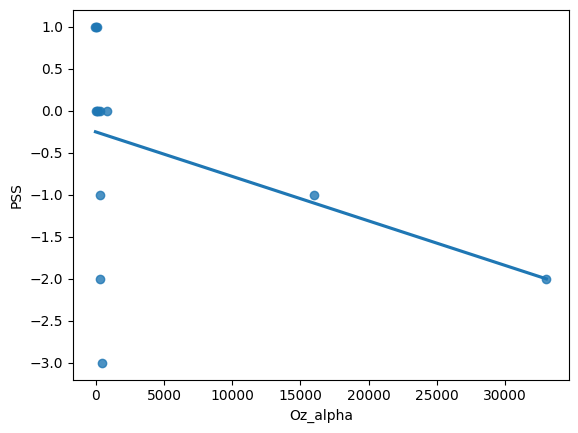

In [17]:
# 生成隨機數據作為示例
# np.random.seed(0) # 確保每次生成的隨機數據相同
# x = np.random.rand(100) * 10 # 生成100個0到10之間的隨機數
# y = 2 * x + np.random.normal(0, 2, 100) # y大致上是x的兩倍加上一些隨機噪聲

# # x 生理資訊
# x = [45.85489764
# ,-134.1840452
# ,589.1329907
# ,12.5334337
# ,-32.28142572
# ,384.9446399
# ,174.3337159
# ,278.5662501
# ,28.60812879
# ,-21.03709019
# ,-22.56073857
# ,0.386242647
# ,555.1202893
# ]
# # y 問卷分數
# y = [-1, 1, -1, -3, 2, -3, -1, -1, -1, 1, -1, 0, -1] #1

# 使用seaborn繪製散點圖和回歸線
# sns.regplot(x=x, y=y)
sns.regplot(x=x, y=y, ci=None)

# 設置圖表標題和軸標籤
# plt.title('Correlation Analysis with Regression Line', fontsize=15)
plt.xlabel('Oz_alpha', fontsize=10)
plt.ylabel('PSS', fontsize=10)

# 顯示圖表
plt.show()

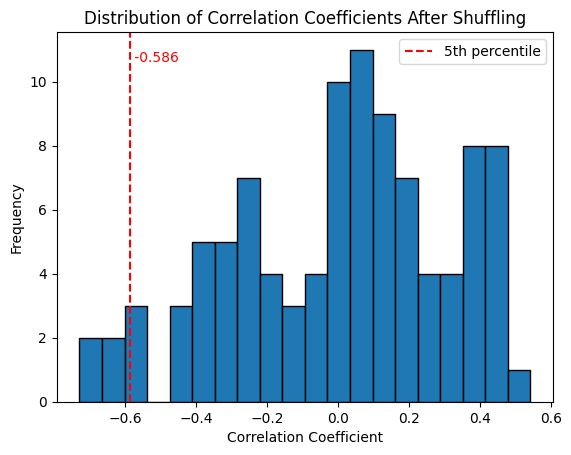

-0.5857021818999143

In [16]:
# 假設您有一個包含壓力量表和生理指標的DataFrame，並且列名分別為 "Stress_Score"、"EEG"、"ECG"、"EDA"、"Respiration"。
# 這裡僅提供示例數據。

df = pd.DataFrame(data)

# 用於存儲隨機打亂後的相關係數
correlations = []

# 計算皮爾森相關係數
# correlation_eeg, p = pearsonr(df["Stress_Score"], df["EEG"])
# correlation_ecg, _ = pearsonr(df["Stress_Score"], df["ECG"])
# correlation_eda, _ = pearsonr(df["Stress_Score"], df["EDA"])
# correlation_respiration, _ = pearsonr(df["Stress_Score"], df["Respiration"])

# 顯示相關性結果
# print("壓力量表與EEG的相關性:", correlation_eeg)
# print(p)
# print("壓力量表與ECG的相關性:", correlation_ecg)
# print("壓力量表與EDA的相關性:", correlation_eda)
# print("壓力量表與Respiration的相關性:", correlation_respiration)

# 進行100次隨機打亂和相關性計算
for _ in range(100):
    shuffled_stress = df["Stress_Score"].sample(frac=1).reset_index(drop=True)  # 隨機打亂問卷數據
    correlation_eeg, p = pearsonr(shuffled_stress, df["EEG"])
    correlations.append(correlation_eeg)

correlations_sorted = sorted(correlations)

# 绘制直方图
plt.hist(correlations_sorted, bins=20, edgecolor='black')

# 在第95%的位置画一条线
# cutoff_index = int(0.95 * len(correlations_sorted)) - 1
cutoff_index = int(0.05 * len(correlations_sorted)) - 1
cutoff_value = correlations_sorted[cutoff_index]
# plt.axvline(x=cutoff_value, color='red', linestyle='--', label='95th percentile')
plt.axvline(x=cutoff_value, color='red', linestyle='--', label='5th percentile')

# 在图上标记第95次的相关系数值
# ***正相關取第95次(要小於原始的) 負相關取第5次(要大於原始的)***
# plt.text(cutoff_value, plt.gca().get_ylim()[1] * 0.95, f' {cutoff_value:.3f}', verticalalignment='top', color='red')
plt.text(cutoff_value, plt.gca().get_ylim()[1] * 0.95, f' {cutoff_value:.3f}', verticalalignment='top', color='red')

plt.title('Distribution of Correlation Coefficients After Shuffling')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.show()

cutoff_value